In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import classification_report

# Loading the Data 

In [2]:
# Loading the input data in pandas dataframe
x_train = pd.read_csv("df_train_2.csv", header = [0]) 
x_test = pd.read_csv("df_test_2.csv", header = [0]) 
print("Training Shape:", x_train.shape,", Testing Shape:", x_test.shape)


Training Shape: (75000, 1965) , Testing Shape: (25000, 1965)


In [3]:
# Loading the output data in pandas dataframe
y_train = pd.read_csv("y_train.csv",header=None)
y_test = pd.read_csv("y_test.csv",header=None)

In [4]:
# Converting the inputs and outputs to the numpy array
X_train = x_train.copy().to_numpy()
X_test = x_test.copy().to_numpy()
Y_train = y_train.copy().to_numpy().reshape(-1)
Y_test = y_test.copy().to_numpy().reshape(-1)

## Logistic Regression with L2 Regularization

In [5]:
# Logistic Regression with L2 Regularization

# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Maximum number of iteration for gradient descent are 200
iteration =200

# learning rate is constant
learning_rate = "constant" 

arr = [0.00001,0.001,0.01,0.1,0.5,1,5,10,100,200]          # arr stores the values of learning rates to be considered


train_score = []                                           # for storing train score for different values of learning rate
test_score = []                                            # for storing test score for different values of learning rate  

print("------------------ Results for Logistic Regression with L2 Regularization ------------------")

for c in arr:
    
    # training the model on X_train by passing the learning rate and max iteration as the parameters
    model = LogisticRegression(max_iter = iteration, C=c)
    model.fit(X_train, Y_train)
    
    # getting the accuracy on training and testing data
    train_score_ = model.score(X_train, Y_train)
    test_score_ = model.score(X_test, Y_test)
    
    # adding the train and test accuracy to train_score and test_score respectively
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    # printing the results
    print("C:",c,"Testing score: ", test_score_," Training score: ",train_score_)
    

------------------ Results for Logistic Regression with L2 Regularization ------------------

C: 1e-05 Testing score:  0.65804  Training score:  0.6687066666666667
C: 0.001 Testing score:  0.83676  Training score:  0.85316
C: 0.01 Testing score:  0.8664  Training score:  0.9051333333333333
C: 0.1 Testing score:  0.8694  Training score:  0.9571066666666667
C: 0.5 Testing score:  0.86616  Training score:  0.98124
C: 1 Testing score:  0.86284  Training score:  0.9853466666666667
C: 5 Testing score:  0.8556  Training score:  0.9891066666666667
C: 10 Testing score:  0.85384  Training score:  0.9896
C: 100 Testing score:  0.85052  Training score:  0.9904666666666667
C: 200 Testing score:  0.8494  Training score:  0.99068



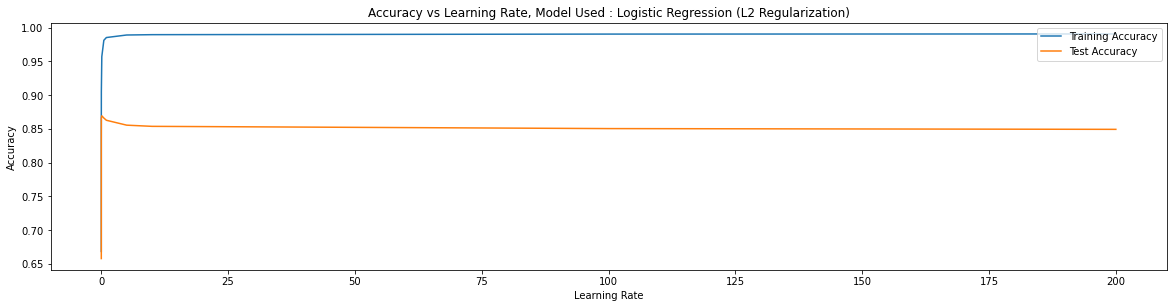

In [6]:
import matplotlib.pyplot as plt
# plotting the loss vs iteration graph for training and validation data
figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
subplot.plot(arr, train_score, label = "Training Accuracy")
subplot.plot(arr, test_score, label = "Test Accuracy")
# subplot.scatter(X_iteration, Y_train_error)
subplot.set_title("Accuracy vs Learning Rate, Model Used : Logistic Regression (L2 Regularization)")
subplot.set_xlabel("Learning Rate")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")


In [7]:
# Best Model

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(penalty = "l2", max_iter = 500, C=0.01)
model.fit(X_train, Y_train)
print(model.score(x_train, Y_train)) # training score
print(model.score(x_test, Y_test)) # testing score


#Classification Report
# print("")
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))


#saving the classifier 
joblib_file = "logisticRegression_R2_Regularization_model.pkl"  
joblib.dump(model, joblib_file)




Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.81      0.84      0.83       735
         2.0       0.85      0.88      0.86       755
         3.0       0.95      0.97      0.96       779
         4.0       0.90      0.95      0.93       752
         5.0       0.97      0.97      0.97       767
         6.0       0.89      0.92      0.91       730
         7.0       0.97      0.96      0.96       743
         8.0       1.00      0.98      0.99       754
         9.0       0.99      0.98      0.99       741
        10.0       0.88      0.92      0.90       753
        11.0       0.85      0.90      0.87       738
        12.0       0.83      0.85      0.84       744
        13.0       0.99      0.99      0.99       742
        14.0       0.90      0.85      0.87       762
        15.0       0.74      0.76      0.75       769
        16.0       0.60      0.49      0.54       729
        17.0       0.87      0.91      0.89      

## Logistic Regression with No Regularization

In [8]:
# Logistic Regression with L1 Regularization

# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Maximum number of iteration for gradient descent are 200
iteration =200

# learning rate is constant
learning_rate = "constant" 

arr = [0.001,0.01,0.1,0.5,10]                              # arr stores the values of learning rates to be considered


train_score = []                                           # for storing train score for different values of learning rate
test_score = []                                            # for storing test score for different values of learning rate  

print("------------------ Results for Logistic Regression with L1 Regularization ------------------")
for c in arr:
    
    # training the model on X_train by passing the learning rate and max iteration as the parameters
    model = LogisticRegression(penalty = "none", max_iter = iteration, C=c)
    model.fit(X_train, Y_train)
    
    # getting the accuracy on training and testing data
    train_score_ = model.score(X_train, Y_train)
    test_score_ = model.score(X_test, Y_test)
    
    # adding the train and test accuracy to train_score and test_score respectively
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    # printing the results
    print("C:",c,"Testing score: ", test_score_," Training score: ",train_score_)


------------------ Results for Logistic Regression with L1 Regularization ------------------

C: 0.001 Testing score:  0.84824  Training score:  0.99108
C: 0.01 Testing score:  0.84824  Training score:  0.99108
C: 0.1 Testing score:  0.84824  Training score:  0.99108
C: 0.5 Testing score:  0.84824  Training score:  0.99108
C: 10 Testing score:  0.84824  Training score:  0.99108



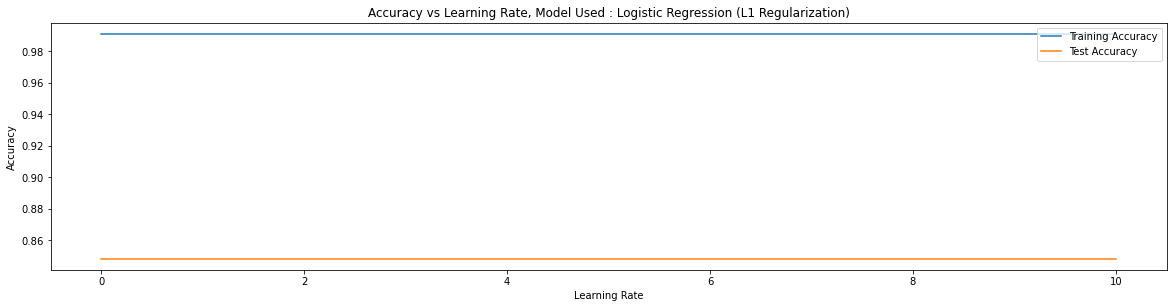

In [9]:
import matplotlib.pyplot as plt
# plotting the loss vs iteration graph for training and validation data
figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
subplot.plot(arr, train_score, label = "Training Accuracy")
subplot.plot(arr, test_score, label = "Test Accuracy")
# subplot.scatter(X_iteration, Y_train_error)
subplot.set_title("Accuracy vs Learning Rate, Model Used : Logistic Regression (L1 Regularization)")
subplot.set_xlabel("Learning Rate")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")



In [10]:
"""  ------------ Best Model  -----------------"""

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = "none", max_iter = 500)
model.fit(X_train, Y_train)

#Classification Report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# print("")
print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))

#saving the classifier 
import joblib

joblib_file = "logisticRegression_No_Regularization_model.pkl"  
joblib.dump(model, joblib_file)


Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       735
         2.0       0.98      0.99      0.99       755
         3.0       1.00      1.00      1.00       779
         4.0       1.00      1.00      1.00       752
         5.0       1.00      1.00      1.00       767
         6.0       1.00      1.00      1.00       730
         7.0       1.00      1.00      1.00       743
         8.0       1.00      1.00      1.00       754
         9.0       1.00      1.00      1.00       741
        10.0       1.00      1.00      1.00       753
        11.0       0.99      0.99      0.99       738
        12.0       1.00      1.00      1.00       744
        13.0       1.00      1.00      1.00       742
        14.0       0.98      0.98      0.98       762
        15.0       1.00      1.00      1.00       769
        16.0       1.00      1.00      1.00       729
        17.0       1.00      0.99      0.99       

# Logistic Regression with L1 Regularization

In [11]:
# Logistic Regression with L1 Regularization

# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Maximum number of iteration for gradient descent are 200
iteration =200

# learning rate is constant
learning_rate = "constant" 

arr = [0.0001, 0.001,0.01,0.1,0.5,1, 5, 10]                # arr stores the values of learning rates to be considered


train_score = []                                           # for storing train score for different values of learning rate
test_score = []                                            # for storing test score for different values of learning rate  

print("------------------ Results for Logistic Regression with L1 Regularization ------------------")
for c in arr:
    
    # training the model on X_train by passing the learning rate and max iteration as the parameters
    model = LogisticRegression(penalty = "l1",solver="liblinear", max_iter = iteration, C=c)
    model.fit(X_train, Y_train)
    
    # getting the accuracy on training and testing data
    train_score_ = model.score(X_train, Y_train)
    test_score_ = model.score(X_test, Y_test)
    
    # adding the train and test accuracy to train_score and test_score respectively
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    # printing the results
    print("C:",c,"Testing score: ", test_score_," Training score: ",train_score_)



------------------ Results for Logistic Regression with L1 Regularization ------------------

C: 0.0001 Testing score:  0.00856  Training score:  0.01048
C: 0.001 Testing score:  0.61496  Training score:  0.6178
C: 0.01 Testing score:  0.80692  Training score:  0.8154533333333334
C: 0.1 Testing score:  0.85708  Training score:  0.88664
C: 0.5 Testing score:  0.8658  Training score:  0.9397066666666667
C: 1 Testing score:  0.86208  Training score:  0.9619066666666667
C: 5 Testing score:  0.84624  Training score:  0.9869466666666666
C: 10 Testing score:  0.83768  Training score:  0.99104



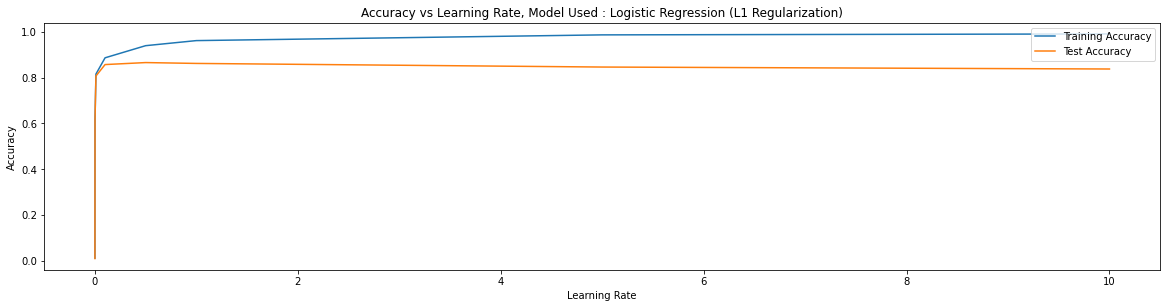

In [12]:
import matplotlib.pyplot as plt
# plotting the loss vs iteration graph for training and validation data
figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
subplot.plot(arr, train_score, label = "Training Accuracy")
subplot.plot(arr, test_score, label = "Test Accuracy")
# subplot.scatter(X_iteration, Y_train_error)
subplot.set_title("Accuracy vs Learning Rate, Model Used : Logistic Regression (L1 Regularization)")
subplot.set_xlabel("Learning Rate")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")


In [13]:
"""  ------------ Best Model  -----------------"""

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = "l1",solver="liblinear", max_iter = 500, C=0.1)
model.fit(X_train, Y_train)

#Classification Report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# print("")

print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))

#saving the classifier 
import joblib

joblib_file = "logisticRegression_L1_Regularization_model.pkl"  
joblib.dump(model, joblib_file)



Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80       735
         2.0       0.81      0.87      0.84       755
         3.0       0.95      0.98      0.96       779
         4.0       0.89      0.95      0.92       752
         5.0       0.96      0.97      0.97       767
         6.0       0.88      0.90      0.89       730
         7.0       0.96      0.95      0.96       743
         8.0       0.98      0.98      0.98       754
         9.0       0.99      0.98      0.99       741
        10.0       0.85      0.90      0.88       753
        11.0       0.81      0.88      0.84       738
        12.0       0.80      0.81      0.81       744
        13.0       0.99      0.98      0.99       742
        14.0       0.87      0.85      0.86       762
        15.0       0.64      0.63      0.64       769
        16.0       0.51      0.42      0.46       729
        17.0       0.87      0.90      0.88      

## SGD Classifier

In [14]:
# SGD Classifier with L2 Regularization

# importing library for SGD Classifier 
from sklearn.linear_model import SGDClassifier

# Maximum number of iteration for gradient descent are 200
iteration = 200

# learning rate is constant
learning_rate = "constant"              
arr = [0.001,0.01,0.1,0.5,10]                  # arr stores the values of learning rates to be considered


d_test = {}                                    # for storing testing results for different values of alpha and learning rate

d_train = {}                                   # for storing training results for different values of alpha and learning rate

alphas = [0.001,0.1,1,10]                      # stores the different values of alphas to be considered

# iterating over each learning rate
for lr in arr:
    
    iterating over each alpha
    for alpha in alphas: 
        
        ## training the model on X_train by passing the current learning rate, current alpha value, max iteration, and 
        #    other neccesary paramteres as arguments to SGDClassifier 
        ## for logistic regression loss is "log", average is "True" for computing averaged SGD weights  
        model = SGDClassifier(alpha = alpha, average=True,loss="log",eta0= lr, learning_rate = learning_rate,max_iter = iteration)
        model.fit(X_train, Y_train)
        
        # getting the accuracy on training and testing data
        train_score_ = model.score(X_train, Y_train)
        test_score_ = model.score(X_test, Y_test)
        
       
        # printing the results
        print("Lr:",lr,"alpha:",alpha,"Testing score: ", test_score_," Training score: ",train_score_)
        
        
        lr_, alpha_ , test_, train_ = lr, alpha, test_score_, train_score_
        
        # adding the results of testing and training to d_test and d_train respectively 
        if(alpha_ not in d_test):
            d_test[alpha_] = [test_]
            d_train[alpha_] = [train_]
        else:
            d_test[alpha_].append(test_)
            d_train[alpha_].append(train_)

            

Lr: 0.001 alpha: 0.001 Testing score:  0.85624  Training score:  0.8778
Lr: 0.001 alpha: 0.1 Testing score:  0.79236  Training score:  0.80008
Lr: 0.001 alpha: 1 Testing score:  0.69796  Training score:  0.70756
Lr: 0.001 alpha: 10 Testing score:  0.25684  Training score:  0.26913333333333334
Lr: 0.01 alpha: 0.001 Testing score:  0.86252  Training score:  0.8913733333333334
Lr: 0.01 alpha: 0.1 Testing score:  0.77724  Training score:  0.7850133333333333
Lr: 0.01 alpha: 1 Testing score:  0.68588  Training score:  0.69648
Lr: 0.01 alpha: 10 Testing score:  0.35732  Training score:  0.37788
Lr: 0.1 alpha: 0.001 Testing score:  0.836  Training score:  0.8563333333333333
Lr: 0.1 alpha: 0.1 Testing score:  0.6666  Training score:  0.6762266666666666
Lr: 0.1 alpha: 1 Testing score:  0.51036  Training score:  0.5214
Lr: 0.1 alpha: 10 Testing score:  0.18684  Training score:  0.20026666666666668
Lr: 0.5 alpha: 0.001 Testing score:  0.71696  Training score:  0.7295866666666667
Lr: 0.5 alpha: 0.1

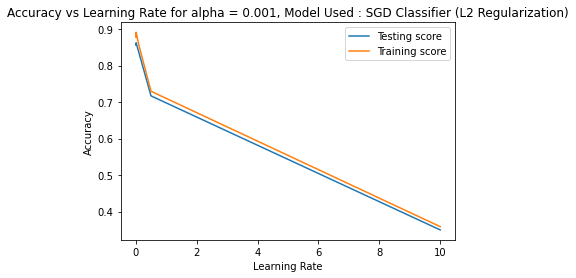

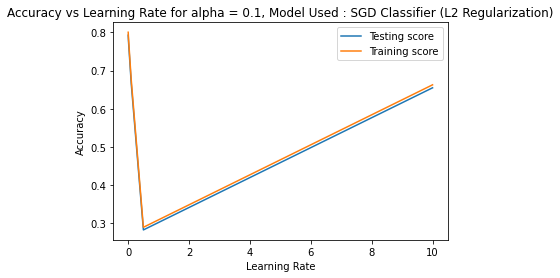

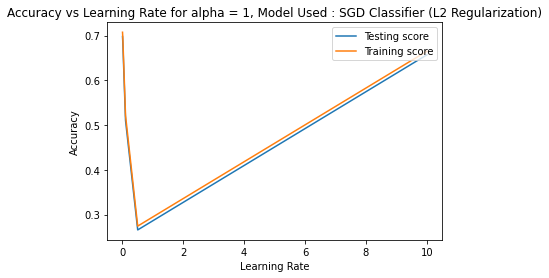

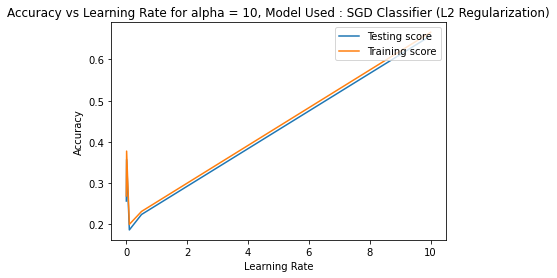

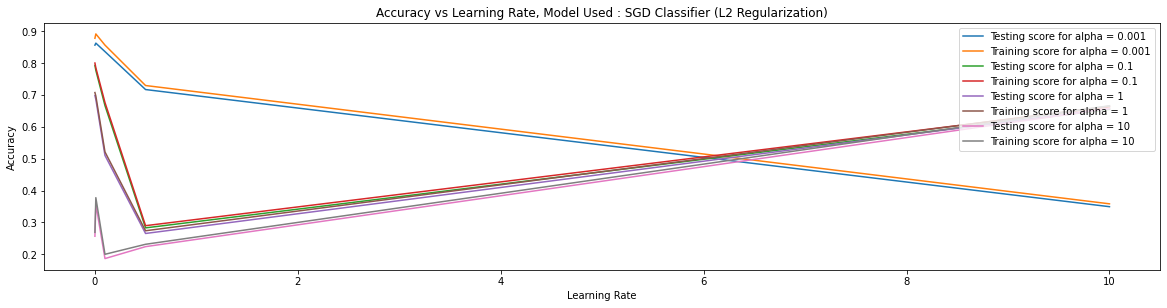

In [15]:
# Plotting the graphs
for i in alphas:
    test_arr = d_test[i]
    train_arr = d_train[i]
    plt.plot(arr, test_arr,label="Testing score")
    plt.plot(arr, train_arr,label="Training score")
    plt.title("Accuracy vs Learning Rate for alpha = "+ str(i)+", Model Used : SGD Classifier (L2 Regularization)")
    plt.xlabel("Learning Rate")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper right")
    plt.show()
    
alphas = [0.001,0.1,1,10]

figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
arr = [0.001,0.01,0.1,0.5,10]

for i in alphas:
    test_arr = d_test[i]
    train_arr = d_train[i]
    subplot.plot(arr, test_arr,label="Testing score for alpha = "+ str(i))
    subplot.plot(arr, train_arr,label="Training score for alpha = "+ str(i))
# adding neccesary details to the plot
subplot.set_title("Accuracy vs Learning Rate, Model Used : SGD Classifier (L2 Regularization)")
subplot.set_xlabel("Learning Rate")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")


In [16]:
"""  ------------ Best Model  -----------------"""

from sklearn.linear_model import SGDClassifier

model = SGDClassifier(alpha = 0.001, average = True, loss = "log",eta0 = 0.01, learning_rate = "constant",max_iter = 500)
model.fit(X_train, Y_train)

#Classification Report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# print("")
print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))

#saving the classifier 
import joblib

joblib_file = "SGD_Classifier_L2_Regularization_model.pkl"  
joblib.dump(model, joblib_file)



Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80       735
         2.0       0.83      0.84      0.83       755
         3.0       0.95      0.98      0.96       779
         4.0       0.89      0.96      0.92       752
         5.0       0.97      0.97      0.97       767
         6.0       0.88      0.91      0.89       730
         7.0       0.96      0.96      0.96       743
         8.0       0.99      0.98      0.99       754
         9.0       0.99      0.98      0.99       741
        10.0       0.83      0.92      0.87       753
        11.0       0.84      0.89      0.86       738
        12.0       0.81      0.85      0.83       744
        13.0       0.99      0.99      0.99       742
        14.0       0.87      0.83      0.85       762
        15.0       0.71      0.63      0.67       769
        16.0       0.62      0.46      0.52       729
        17.0       0.85      0.90      0.88       